<a href="https://colab.research.google.com/github/fasthill/ML-DL-study-alone/blob/main/8-3%20%ED%95%A9%EC%84%B1%EA%B3%B1%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98%20%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망의 시각화

## 가중치 시각화

#### 저장된 best cnn model.h5 읽어 오기

In [41]:
!wget https://github.com/fasthill/ML-DL-study-alone/raw/main/best_cnn_model.h5  # github 데이터 이용 -- repo이름/raw/main/ branch 이름 삽입

--2022-03-07 04:52:46--  https://github.com/fasthill/ML-DL-study-alone/raw/main/best_cnn_model.h5
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fasthill/ML-DL-study-alone/main/best_cnn_model.h5 [following]
--2022-03-07 04:52:46--  https://raw.githubusercontent.com/fasthill/ML-DL-study-alone/main/best_cnn_model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4049416 (3.9M) [application/octet-stream]
Saving to: ‘best_cnn_model.h5.1’

best_cnn_model.h5.1 100%[===================>]   3.86M  --.-KB/s    in 0.07s   

2022-03-07 04:52:47 (57.8 MB/s) - ‘best_cnn_model.h5.1’ saved [4049416/4049416]


In [78]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [43]:
model = load_model('best_cnn_model.h5')

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [45]:
model.layers

In [46]:
type(model.layers[0])

keras.layers.convolutional.Conv2D

In [47]:
# dir(model.layers[0])

In [48]:
model.layers[0].kernel.shape

TensorShape([3, 3, 1, 32])

In [49]:
conv = model.layers[0]  # 첫번째 layer

In [50]:
print('kernel size : {} \nbias_size : {}'.format(conv.weights[0].shape, conv.weights[1].shape))
# 필터 갯수 32, kernel size; 3 by 3 by 1 channel
# 절편은 filter 갯수

kernel size : (3, 3, 1, 32) 
bias_size : (32,)


In [51]:
conv_weights = conv.weights[0].numpy()

In [52]:
conv_weights.shape

(3, 3, 1, 32)

In [53]:
print(conv_weights.mean(), conv_weights.std())

-0.008936822 0.21529211


In [54]:
print(conv_weights.max(), conv_weights.min())

0.37304044 -1.3444066


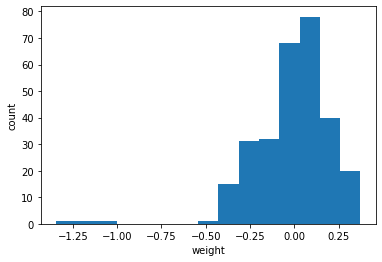

In [55]:
plt.hist(conv_weights.reshape(-1, 1), bins=15)
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

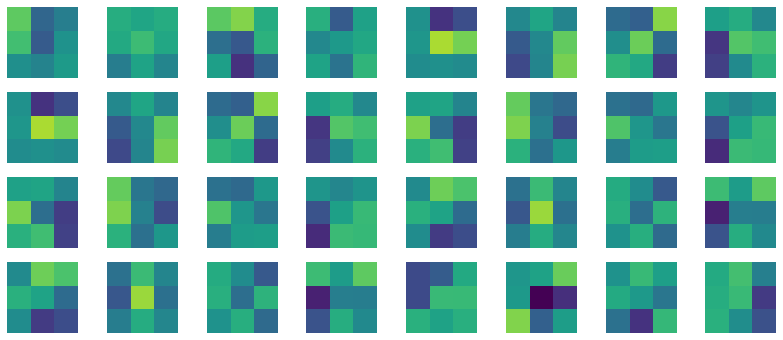

In [56]:
figs, axs = plt.subplots(4, 8, figsize=(14,6))
for i in range(4):
  for j in range(8):
    # axs[i,j].imshow(conv_weights[:,:,0,i*4 + j])
    axs[i,j].imshow(conv_weights[:,:,0,i*4 + j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')

In [57]:
no_training_model = Sequential()
no_training_model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [58]:
no_training_model.layers  # 한 개의 layer만 있음.

In [59]:
no_training_conv = no_training_model.layers[0]
print('kernel size : {}'.format(no_training_conv.weights[0].shape))
# 필터 갯수 32, kernel size; 3 by 3 by 1 channel

kernel size : (3, 3, 1, 32)


In [60]:
no_training_weights = no_training_conv.weights[0].numpy()

In [61]:
print(no_training_weights.mean(), no_training_weights.std())

-0.001041812 0.08360384


In [62]:
no_training_weights.shape

(3, 3, 1, 32)

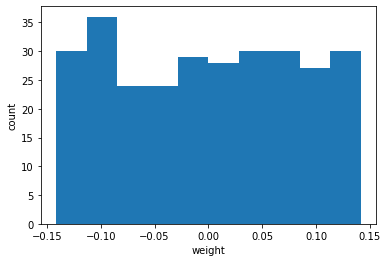

In [63]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

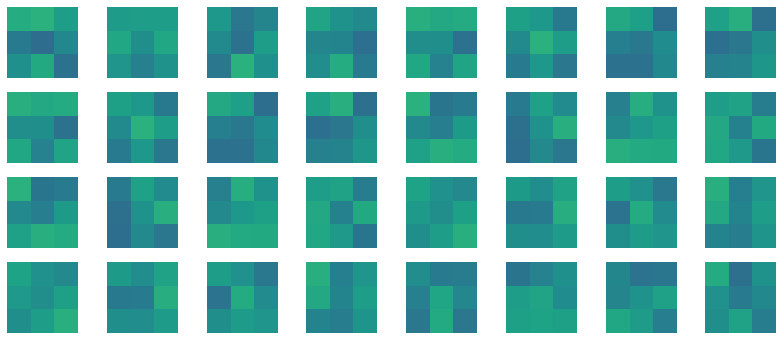

In [64]:
figs, axs = plt.subplots(4, 8, figsize=(14,6))
for i in range(4):
  for j in range(8):
    # axs[i,j].imshow(conv_weights[:,:,0,i*4 + j])
    axs[i,j].imshow(no_training_weights[:,:,0,i*4 + j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

## 함수형 API

#### sequential API에서는 model = Sequential() 선언후 model.add() 등으로 진행하나, <br> 
#### functional API에서는 model =  Model()로 객체 구성을 마지막에 구성함.

In [65]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [66]:
conv_acti = Model(model.input, model.layers[0].output)

In [67]:
# conv_one = Conv2D(32, kernel_size=3, activation='relu', padding='same')
# conv_two = Conv2D(64, kernel_size=3, activation='relu', padding='same')
# maxpooling = MaxPooling2D(2)
# flatten = Flatten()
# dense_one = Dense(100, activation='relu')
# dropout = Dropout(0.4)
# dense_two = Dense(10, activation='softmax')

# inputs = Input(shape=(28,28,1))
# conv1 = conv_one(input)
# maxpool1 = maxpooling(conv1)
# conv2 = conv_two(maxpool1)
# maxpool2 = maxpooling(conv2)
# flatten1 = flatten(maxpool2)(maxpool2)
# dense1 = dense_one(flatten1)
# dropout1 = dropout(dense1)
# output = dense_two(dropout1)
# model = Model(inputs=inputs, outputs=output)

위와 같이 객체를 구성하여 해도 되고, 아래와 같이 직접 구성해도 됨.

In [90]:
inputs = Input(shape=(28,28,1))
conv1 = Conv2D(32, kernel_size=3, activation='relu', padding='same')(inputs)
maxpool1 = MaxPooling2D(2)(conv1)
conv2 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(maxpool1)
maxpool2 = MaxPooling2D(2)(conv2)
flatten1 = Flatten()(maxpool2)
dense1 = Dense(100, activation='relu')(flatten1)
dropout1 = Dropout(0.4)(dense1)
output = Dense(10, activation='softmax')(dropout1)
model = Model(inputs=inputs, outputs=output)

In [91]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [93]:
(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28,28,1) / 255
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [94]:
checkpoint_cb = ModelCheckpoint('best_cnn_model_func_API.h5', save_best_only=True)

In [95]:
early_stopping_cb = EarlyStopping(patience=2, restore_best_weights=True)

In [96]:
history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
          callbacks=[checkpoint_cb, early_stopping_cb], 
          validation_data = (val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5175 - accuracy: 0.8141 - val_loss: 0.3221 - val_accuracy: 0.8800
Epoch 2/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3387 - accuracy: 0.8781 - val_loss: 0.2805 - val_accuracy: 0.8961
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2883 - accuracy: 0.8960 - val_loss: 0.2533 - val_accuracy: 0.9057
Epoch 4/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2579 - accuracy: 0.9057 - val_loss: 0.2459 - val_accuracy: 0.9084
Epoch 5/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2345 - accuracy: 0.9148 - val_loss: 0.2376 - val_accuracy: 0.9106
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2132 - accuracy: 0.9211 - val_loss: 0.2294 - val_accuracy: 0.9174
Epoch 7/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1977 - accuracy: 0.9275 - val_loss: 0.2199 - val_ac

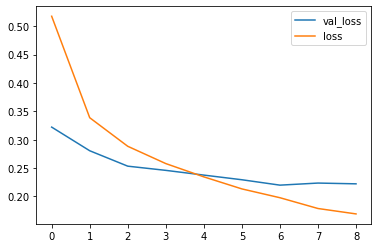

In [101]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['val_loss', 'loss'])
plt.show()

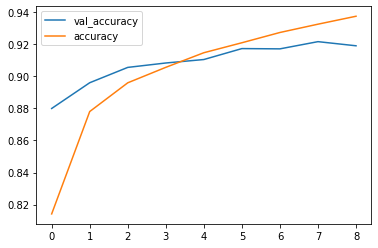

In [102]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['val_accuracy', 'accuracy'])
plt.show()

In [107]:
print(f'best_epoch: {early_stopping_cb.best_epoch}, stopped_epoch: {early_stopping_cb.stopped_epoch}')

best_epoch: 6, stopped_epoch: 8


In [108]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2199 - accuracy: 0.9172


[0.2198706865310669, 0.9172499775886536]

## 특성 맵 시각화

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


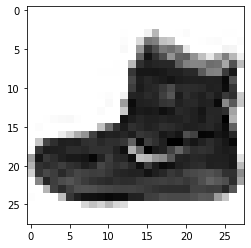

In [ ]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [ ]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

In [ ]:
print(feature_maps.shape)

(1, 28, 28, 32)


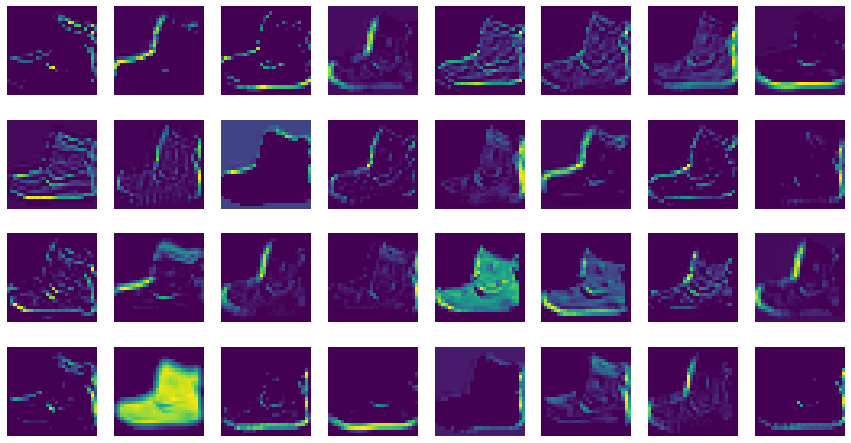

In [ ]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [ ]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [ ]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

In [ ]:
print(feature_maps.shape)

(1, 14, 14, 64)


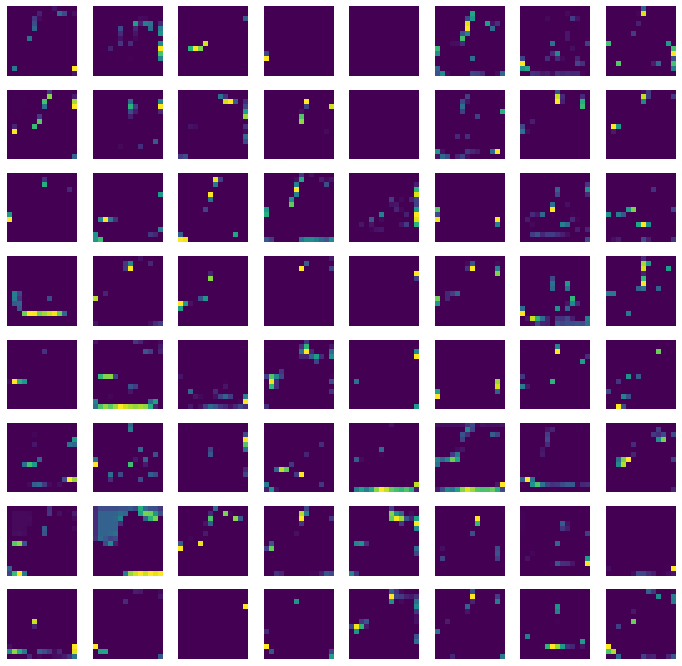

In [ ]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()